# 03. 분류모델 - 개선

붓꽃의 품종을 분류하는 문제를 머신러닝 알고리즘으로 어떻게 해결하는지 살펴봅니다.

* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

## Step0. 준비

### 라이브러리 로딩

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### 데이터 로딩

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step1. 데이터 전처리

### EDA

In [8]:
# 데이터프레임의 요약 정보
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


- 데이터는 총 150개의 로우로 구성되어있으며, 컬럼은 5개가 존재한다.
- 각 컬럼의 결측치는 존재하지 않는다.

- sepal length : 꽃받침의 길이
- sepal width : 꽃받침의 너비
- petal length : 꽃잎의 길이
- petal width : 꽃잎의 너비
- label : 품종

In [9]:
# 데이터프레임의 통계 정보 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# 품종(label) 카테고리 확인
iris_df['label'].unique()

array([0, 1, 2])

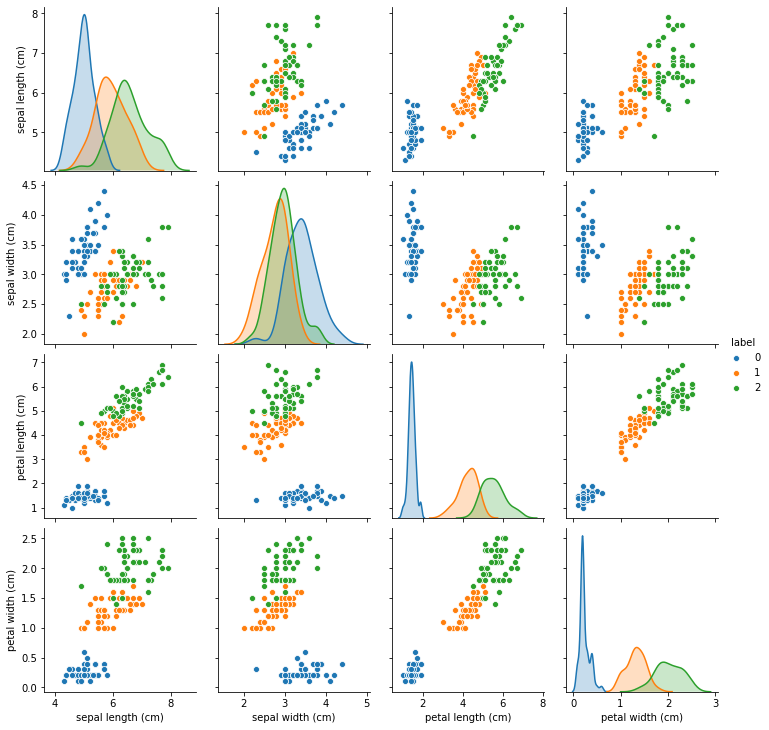

In [11]:
# iris 데이터의 pairplot
sns.pairplot(iris_df, hue='label')

### 결측치처리
 - 결측치가 존재하지 않음으로 생략

In [12]:
# 결측치 확인
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

### 데이터분할

In [13]:
X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
len(X_train)

112

In [15]:
len(X_test)

38

## Step2. 학습

In [16]:
# DecisionTreeClassifier 객체 생성 
model = DecisionTreeClassifier(random_state=11)

# 학습 수행 
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

## Step3. 평가

In [17]:
#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
score

0.9473684210526315

## Step4. 적용

In [18]:
import numpy as np
data = np.array([
    [5.4, 4, 1.5, 0.2],
    [6.2 , 2.7, 5.1, 1.6],
    [6.5, 3.1 , 5.2, 2. ]
])

y_pred = model.predict(data)
y_pred

array([0, 2, 2])

## Step5.1 개선(KFold)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
i = 0
accuracy_list = []

for train_index, test_index in kfold.split(X):    
    print('{}번째 학습'.format(i+1))
    print('학습용 데이터:{}'.format(train_index))
    print('테스트용 데이터:{}'.format(test_index))
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
        
    #학습
    model.fit(X_train , y_train)
    
    #적용
    pred = model.predict(X_test)
   
    #평가
    accuracy = accuracy_score(y_test,pred)    
    print('정확도:{}'.format(accuracy))
    
    accuracy_list.append(accuracy)
    i = i + 1
    print('-------------------------------------------------------------')

print('{0}번 학습 평균 정확도:{1}'.format(i, np.mean(accuracy_list))) 

1번째 학습
학습용 데이터:[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
테스트용 데이터:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
정확도:1.0
-------------------------------------------------------------
2번째 학습
학습용 데이터:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 1

## Step5.2 개선(StratifiedKFold)

In [20]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)
i = 0
accuracy_list = []

for train_index, test_index in skfold.split(X, y):
    print('{}번째 학습'.format(i+1))
    print('학습용 데이터:{}'.format(train_index))
    print('테스트용 데이터:{}'.format(test_index))
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
        
    #학습
    model.fit(X_train , y_train)
    
    #적용
    pred = model.predict(X_test)
   
    #평가
    accuracy = accuracy_score(y_test,pred)    
    print('정확도:{}'.format(accuracy))
    
    accuracy_list.append(accuracy)
    i = i + 1
    print('-------------------------------------------------------------')

print('{0}번 학습 평균 정확도:{1}'.format(i, np.mean(accuracy_list))) 

1번째 학습
학습용 데이터:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
테스트용 데이터:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
정확도:0.98
-------------------------------------------------------------
2번째 학습
학습용 데이터:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101

## Step5.3 개선(cross_validate)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습 
scores = cross_validate(model, X, y, cv=3, return_train_score=True, return_estimator=True)
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score', 'train_score']

In [22]:
scores
# scores['test_score']
# scores['estimator'][0]

{'fit_time': array([0.00199389, 0.00202084, 0.00196314]),
 'score_time': array([0.00099778, 0.        , 0.00099802]),
 'estimator': (DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=11, splitter='best'),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=11, splitter='b

## Step5.4 개선(GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()

In [23]:
# parameter를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid: 하이퍼파라미터
# cv: 3개의 train, test set fold 로 나누어 학습    
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3)

# param_grid의 하이퍼파라미터들을 순차적으로 학습
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002340,4.873862e-04,0.000997,0.000814,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.676471,0.666667,0.666667,0.669935,0.004622,5
1,0.001306,4.656074e-04,0.001021,0.000017,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.676471,0.666667,0.666667,0.669935,0.004622,5
2,0.001649,4.604901e-04,0.000332,0.000470,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.941176,0.939394,0.878788,0.919786,0.028999,4
3,0.000997,1.946680e-07,0.000665,0.000470,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.970588,0.939394,0.878788,0.929590,0.038113,3
4,0.001667,4.694290e-04,0.000338,0.000478,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.970588,0.939394,0.969697,0.959893,0.014500,1
5,0.000997,1.593426e-06,0.000997,0.000001,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.970588,0.939394,0.969697,0.959893,0.014500,1


In [24]:
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.669935,5,0.676471,0.666667,0.666667
1,"{'max_depth': 1, 'min_samples_split': 3}",0.669935,5,0.676471,0.666667,0.666667
2,"{'max_depth': 2, 'min_samples_split': 2}",0.919786,4,0.941176,0.939394,0.878788
3,"{'max_depth': 2, 'min_samples_split': 3}",0.929590,3,0.970588,0.939394,0.878788
4,"{'max_depth': 3, 'min_samples_split': 2}",0.959893,1,0.970588,0.939394,0.969697
5,"{'max_depth': 3, 'min_samples_split': 3}",0.959893,1,0.970588,0.939394,0.969697


In [25]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# 최고 성능을 낸 분류기
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9599
테스트 데이터 세트 정확도: 1.0000
